In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(21,321)]
i =0
result = np.zeros((3600,601,3600))

In [3]:
for yy in years:
    for mm in months:
        #data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        #cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0323-09.aice.nc
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.UVEL.nc')
        plotvar = data.variables['UVEL'][0,33,:,:]
        #plotvar = data.variables['HMXL'][0,:,:]
        #lont = data.variables['lont_bounds'][:,:,0]
        #latt = data.variables['latt_bounds'][:,:,0]
        #lont = lont[248:344,700:1400]
        #latt = latt[248:344,700:1400]
        plotvar = plotvar[:,:]
#       lont = lont[180:320,500:1200]
#        latt = latt[180:320,500:1200]
#        plotvar = plotvar[180:320,500:1200]
        aveplot = plotvar
        
        result[i] = aveplot
        
        i = i + 1

In [5]:
re = np.nanmean(result,axis=0)

In [6]:
np.savetxt('uave.out', re)

In [8]:
re.shape

(601, 3600)

In [61]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0201-12.VVEL.nc')
plotvar = data.variables['VVEL'][0,33,:,:]

In [66]:
plotvar.max()

81.95983

In [9]:
i =0
result2 = np.zeros((3600,601,3600))

for yy in years:
    for mm in months:
        #data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        #cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0323-09.aice.nc
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.VVEL.nc')
        plotvar = data.variables['VVEL'][0,33,:,:]
        #plotvar = data.variables['HMXL'][0,:,:]
        #lont = data.variables['lont_bounds'][:,:,0]
        #latt = data.variables['latt_bounds'][:,:,0]
        #lont = lont[248:344,700:1400]
        #latt = latt[248:344,700:1400]
        plotvar = plotvar[:,:]
#       lont = lont[180:320,500:1200]
#        latt = latt[180:320,500:1200]
#        plotvar = plotvar[180:320,500:1200]
        aveplot = plotvar
        
        result2[i] = aveplot
        
        i = i + 1

In [27]:
re2 = np.nanmean(result2,axis=0)

In [2]:
np.savetxt('vave.out', re2)

NameError: name 're2' is not defined

In [3]:
dataweddle = np.loadtxt("uave.out")

In [4]:
re = dataweddle

In [5]:
dataweddle = np.loadtxt("vave.out")
re2 = dataweddle

In [6]:
re[re ==-1] = np.nan

In [7]:
re2[re2 ==-1] = np.nan

In [8]:
re[re >100] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [9]:
re2[re2 >100] = np.nan

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [10]:
np.where(re2>10)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(array([ 37,  37,  37, ..., 600, 600, 600]),
 array([2828, 2829, 2830, ..., 2988, 2989, 2990]))

In [24]:
        datau=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.UVEL.nc')
        plotvaru = datau.variables['UVEL'][0,0,:,:]
        lontu = datau.variables['ULONG'][:,:]
        lattu = datau.variables['ULAT'][:,:]

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


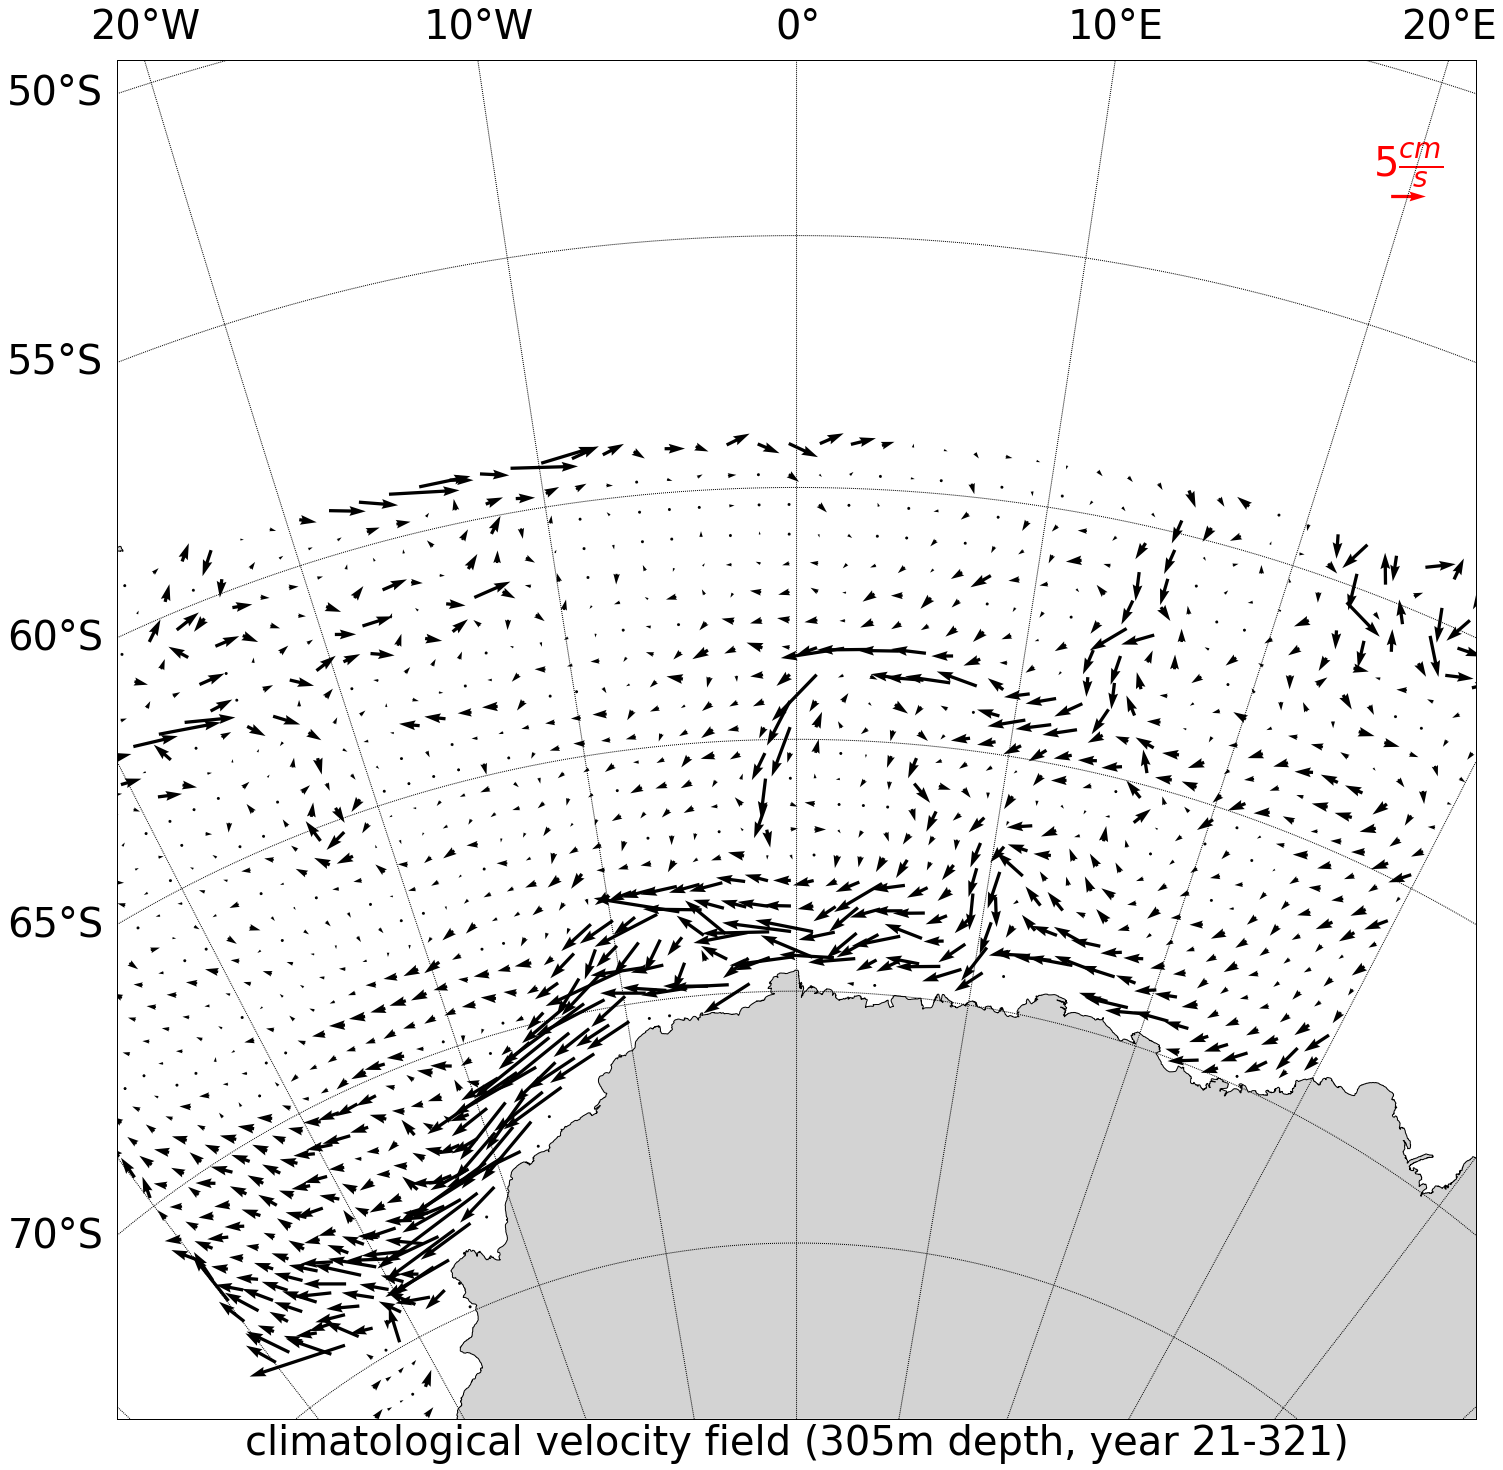

In [25]:
        #nice_levels = [-204,-202,-200,-198,-196,-194,-192,-190,-188,-186,-184,-182,-180,-178,-176,-174,-172,-170]
        plt.figure(figsize=(25,25))
        my_font = {'fontname':'Cambria', 'size':'40'}

        map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 3000000,height = 3000000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

       
        xq,yq=map(lontu,lattu)
        #CP = map.quiver(xq[310:420:12,1200:1300:2],yq[310:420:2,1200:1300:2],re[310:420:2,1200:1300:2],re2[310:420:2,1200:1300:2],units='inches')
        CP = map.quiver(xq[:450:12,700:1400:12],yq[:450:12,700:1400:12],re[:450:12,700:1400:12],re2[:450:12,700:1400:12],units='inches')
        Q = plt.quiverkey(CP, 0.95, 0.9, 5, r'$5 \frac{cm}{s}$',fontproperties={'size': '40'}, color='r', labelcolor='r')

        plt.xlabel('climatological velocity field (305m depth, year 21-321)',**my_font)
        plt.savefig("/scratch/user/xiliangdiao/plot/velocity1(21-321)")